# QRM First Assignment

Questions so far:
1. What is the difference between Close and Adj. Close? Which to use?
2. np.log is used for natural logarithm, right?
(Natural logarithm, element-wise. --copied from documentation page)

**Close price adjusted for splits.** 
<br>
''The closing price of a stock is the price of that stock at the close of the trading day.''


**Adjusted close price adjusted for both dividends and splits.**
<br>
''The adjusted closing price is a more complex analysis that uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings to determine a value. The adjusted closing price represents a more accurate reflection of a stock's value, since distributions and new offerings can alter the closing price.''

So I think in the sense of these dataset, the close price is also a kind of adjusted price since it is adjusted for splits.<br>
I personally would think the adjusted close price (both div and splits) would be better since it's more accurate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy as sc
import glob
import matplotlib.pyplot as plt
import os
#from arch import arch_model
#from fnGARCH_2 import *

In [2]:
BTC = pd.read_csv("01_Data/BTCUSD.csv",)
DBC = pd.read_csv("01_Data/DBC.csv")
DE_1YBOND = pd.read_csv("01_Data/DE_1YBOND.csv")
GSPC = pd.read_csv("01_Data/GSPC.csv")
N225 = pd.read_csv("01_Data/N225.csv") 

In [3]:
BTC.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-31,0.7897,0.7680,0.8010,0.7846,0.7846,542900
1,2011-04-01,0.7846,0.7741,0.7970,0.7741,0.7741,248300
2,2011-04-04,0.7790,0.5619,0.7850,0.6800,0.6800,2165200
3,2011-04-05,0.6800,0.5800,0.7478,0.7100,0.7100,652200
4,2011-04-06,0.7100,0.6902,0.7500,0.7400,0.7400,626400


## Exploratory Data Analysis

1. Create lag variable of the adj.close column to calculate portfolio returns
2. Calculate portfolio returns using natural logarithm: log-return ui= ln(Si/Si-1)
2. Using the historical returns, assess the validity of the normal approximation: a) by comparing the histograms to the densities of the normal distribution b) by a QQ-plot

In [4]:
#1.Create lag
BTC['adj_close_lag'] = BTC['Adj Close'].shift(1)
#Calculate asset returns - later to be done for the whole portfolio
BTC['btc_return'] = np.log(BTC['Adj Close']/BTC['adj_close_lag']) 
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_lag,btc_return
0,2011-03-31,0.7897,0.7680,0.8010,0.7846,0.7846,542900,NaN,NaN
1,2011-04-01,0.7846,0.7741,0.7970,0.7741,0.7741,248300,0.7846,-0.013473
2,2011-04-04,0.7790,0.5619,0.7850,0.6800,0.6800,2165200,0.7741,-0.129608
3,2011-04-05,0.6800,0.5800,0.7478,0.7100,0.7100,652200,0.6800,0.043172
4,2011-04-06,0.7100,0.6902,0.7500,0.7400,0.7400,626400,0.7100,0.041385


((array([-3.43613514, -3.18806125, -3.05063292, ...,  3.05063292,
          3.18806125,  3.43613514]),
  array([-0.84876461, -0.46473041, -0.45154429, ...,  0.59337118,
          1.47439456,         nan])),
 (nan, nan, nan))

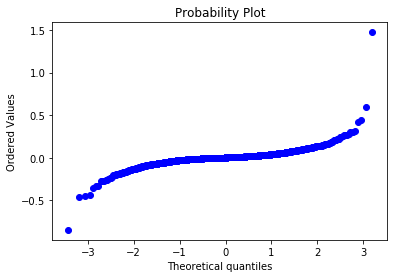

In [5]:
#Create QQ-plot 
sc.stats.probplot(BTC['btc_return'], dist="norm", plot=plt) 

To-do (preprocessing):
1. Debug Nikkei data (import-solved)
2. Merge all datasets together
3. Calculate portfolio returns
4. Create QQ plot again for the whole portfolio

In [5]:
print(BTC.shape)
print(DBC.shape)
print(DE_1YBOND.shape)
print(GSPC.shape)
print(N225.shape)

(2349, 9)
(2264, 7)
(2586, 6)
(2264, 7)
(2225, 7)


In [4]:
'''The attribute format of this bond is different from others, is it a problem? '''
DE_1YBOND.head()

,Date,Price,Open,High,Low,Change %
0,"Mar 31, 2020",-0.650,-0.717,-0.626,-0.748,-5.66%
1,"Mar 30, 2020",-0.689,-0.685,-0.658,-0.881,-1.85%
2,"Mar 27, 2020",-0.702,-0.626,-0.600,-0.920,14.89%
3,"Mar 26, 2020",-0.611,-0.645,-0.562,-0.679,-3.63%
4,"Mar 25, 2020",-0.634,-0.615,-0.557,-0.674,4.97%


In [5]:
''' Change the date format of DE_1YBOND'''
from datetime import datetime

new_date = []
for i in DE_1YBOND['Date']:
    new = datetime.strptime(i, '%b %d, %Y').strftime('%Y-%m-%d')
    new_date.append(new)

DE_1YBOND['Date']=new_date

In [6]:
DE_1YBOND.head()

,Date,Price,Open,High,Low,Change %
0,2020-03-31,-0.650,-0.717,-0.626,-0.748,-5.66%
1,2020-03-30,-0.689,-0.685,-0.658,-0.881,-1.85%
2,2020-03-27,-0.702,-0.626,-0.600,-0.920,14.89%
3,2020-03-26,-0.611,-0.645,-0.562,-0.679,-3.63%
4,2020-03-25,-0.634,-0.615,-0.557,-0.674,4.97%


Check if there is null or empty input

In [9]:
BTC.isnull().sum()

#this null value is due to the shift, so it won't cause problem

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
adj_close_lag    1
btc_return       1
dtype: int64

In [7]:
DBC.isnull().sum()
DBC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-31,30.490000,30.590000,30.350000,30.510000,29.643923,1834200
1,2011-04-01,30.559999,30.780001,30.410000,30.719999,29.847960,3428900
2,2011-04-04,30.879999,31.090000,30.830000,31.000000,30.120012,2009700
3,2011-04-05,31.020000,31.180000,30.990000,31.030001,30.149160,1533000
4,2011-04-06,31.270000,31.350000,31.049999,31.120001,30.236607,1309800


In [11]:
DE_1YBOND.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [12]:
GSPC.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [175]:
N225.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
missing_N225 = N225[N225.isna().any(axis=1)]['Date']
print(len(N225[N225.isna().any(axis=1)]))
print(missing_N225)

20
1545    2017-07-17
1564    2017-08-11
1590    2017-09-18
1605    2017-10-09
1638    2017-11-23
1665    2018-01-01
1666    2018-01-02
1667    2018-01-03
1670    2018-01-08
1695    2018-02-12
1722    2018-03-21
1750    2018-04-30
1753    2018-05-03
1754    2018-05-04
1850    2018-09-17
1855    2018-09-24
1865    2018-10-08
1899    2018-11-23
1920    2018-12-24
1925    2018-12-31
Name: Date, dtype: object


In [9]:
''' Drop the rows which contains missing value in N225'''
N225_drop = N225.dropna(axis=0)
N225_drop = N225_drop.reset_index(drop=True)
print(len(N225_drop))
N225_drop.isnull().sum()




2205


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Use N225 as a base date set (2205 trading dates)

In [95]:
s1 = set(GSPC['Date'])
s2 = set(DBC['Date'])
s3 = set(N225_drop['Date'])
s4 = set(BTC['Date'])
s5 = set(DE_1YBOND['Date'])

d = [x for x in s3 if x in s1 and x in s2 and x in s4 and x in s5]

asset = [s1,s2,s3,s4,s5]

intersec = s3.intersection(s1,s2,s4,s5)
print(len(intersec))
print(len(d))
set(d) == set(intersec)

print('The dates exist in all five dataset: 2118 trading days')


2118
2118
The dates exist in all five dataset: 2118 trading days


In [103]:
'''  Create new dataframes, keep only the overlapping date-related data'''

new = []
asset = [BTC,DBC,DE_1YBOND,GSPC,N225]
for item in asset:
    miss = []
    for i in item['Date']:
        if i not in intersec:
            miss = miss + item.index[item['Date']==i].tolist()
    item = item.drop(miss)
    item = item.reset_index(drop=True)
    new.append(item)

In [104]:
''' Assign the dataframe '''

BTC_new = new[0]
DBC_new = new[1]
DE_1YBOND_new = new[2]
GSPC_new = new[3]
N225_new = new[4]

asset = [BTC_new,DBC_new,DE_1YBOND_new,GSPC_new,N225_new]

for i in asset:
    print(i.shape)

(2118, 7)
(2118, 7)
(2118, 6)
(2118, 7)
(2118, 7)


In [105]:
''' Create new dataframe containing only the same dates related information  '''

#asset_price , asset_adj_price , return

asset = [BTC_new,DBC_new,GSPC_new,N225_new]
asset_name = ['BTC','DBC','GSPC','N225']

for i in range(len(asset)):
    asset[i].rename(columns={'Adj Close':'Price_'+asset_name[i]}, inplace=True)
    asset[i]['Price_'+asset_name[i]+'_lag'] = asset[i]['Price_'+asset_name[i]].shift(1)
    asset[i][asset_name[i]+'_return'] = np.log(asset[i]['Price_'+asset_name[i]]/asset[i]['Price_'+asset_name[i]+'_lag'])
    
print(BTC_new)

            Date         Open         High          Low        Close  \
0     2011-03-31     0.789700     0.768000     0.801000     0.784600   
1     2011-04-01     0.784600     0.774100     0.797000     0.774100   
2     2011-04-04     0.779000     0.561900     0.785000     0.680000   
3     2011-04-05     0.680000     0.580000     0.747800     0.710000   
4     2011-04-06     0.710000     0.690200     0.750000     0.740000   
...          ...          ...          ...          ...          ...   
2113  2020-03-24  6436.642578  6411.065918  6789.022949  6734.804688   
2114  2020-03-25  6738.717285  6536.926270  6892.511719  6681.062500   
2115  2020-03-26  6675.170898  6590.962891  6735.462891  6716.439941   
2116  2020-03-27  6719.386719  6466.703125  6793.838379  6469.799316   
2117  2020-03-30  6458.755371  6480.871094  6441.589355  6441.589355   

        Price_BTC   Volume  Price_BTC_lag  BTC_return  
0        0.784600   542900            NaN         NaN  
1        0.774100   248

In [106]:
asset = [BTC_new,DBC_new,GSPC_new,N225_new]

result = []
for i in range(len(asset)):
    print(asset_name[i])
    if i == 0:
        asset[i] = asset[i][['Date','Price_'+asset_name[i],'Price_'+asset_name[i]+'_lag',asset_name[i]+'_return']]
    else:
        asset[i] = asset[i][['Price_'+asset_name[i],'Price_'+asset_name[i]+'_lag',asset_name[i]+'_return']]
    result.append(a)

BTC
DBC
GSPC
N225


In [107]:
# Check the shape
for i in asset:
    print(i.shape)

(2118, 4)
(2118, 3)
(2118, 3)
(2118, 3)


In [108]:
data = pd.concat(asset,axis=1)
data.tail()

,Date,Price_BTC,Price_BTC_lag,BTC_return,Price_DBC,Price_DBC_lag,DBC_return,Price_GSPC,Price_GSPC_lag,GSPC_return,Price_N225,Price_N225_lag,N225_return
2113,2020-03-24,6734.804688,6416.314941,0.048445,11.31,11.07,0.021449,2447.330078,2237.399902,0.089683,18092.349609,16887.779297,0.068899
2114,2020-03-25,6681.062500,6734.804688,-0.008012,11.50,11.31,0.016660,2475.560059,2447.330078,0.011469,19546.630859,18092.349609,0.077314
2115,2020-03-26,6716.439941,6681.062500,0.005281,11.46,11.50,-0.003484,2630.070068,2475.560059,0.060544,18664.599609,19546.630859,-0.046174
2116,2020-03-27,6469.799316,6716.439941,-0.037413,11.42,11.46,-0.003497,2541.469971,2630.070068,-0.034268,19389.429688,18664.599609,0.038099
2117,2020-03-30,6441.589355,6469.799316,-0.004370,11.39,11.42,-0.002630,2626.649902,2541.469971,0.032967,19084.970703,19389.429688,-0.015827


**Discussion:**
**1. Drop the 20 rows for N225 dataset?** <br>
AM: Correct and we need to synchronise with the rest of the data by only considering days where an observation is available for all risk factors <br>
**2. The DE_1YBOND attribute doesn't match with other 4, will the attribute affect the analysis? If not then we can keep them** <br>
AM: This is because the first 4 datasets are from Yahoo data and this one is from another source. It's not a problem as long as we can merge it by Date to the rest of the data.<br>
**3. There would defo some outliers in the data, we shoud decide how to deal with them.**<br>
AM: Good question, let's ask Svetlana and Sarah.

**09-April-2020**
**AM Comments:**
   1. I think that trying with 2 datasets should happen in a bit different way  ((done))
   2. Isolate the columns of adj. price for each asset and give them clear names to which asset they belong ((done))
   3. Perform a join with on the Date variable (I think the concat function is not doing the job here) ((done))

**11.04 Pan:** I fixed the above probelms.

I did these steps below:  

In [13]:
df_list = [BTC, DBC, GSPC, N225]

In [15]:
df_list[:4]

[            Date         Open         High          Low        Close  \
 0     2011-03-31     0.789700     0.768000     0.801000     0.784600   
 1     2011-04-01     0.784600     0.774100     0.797000     0.774100   
 2     2011-04-04     0.779000     0.561900     0.785000     0.680000   
 3     2011-04-05     0.680000     0.580000     0.747800     0.710000   
 4     2011-04-06     0.710000     0.690200     0.750000     0.740000   
 ...          ...          ...          ...          ...          ...   
 2344  2020-03-25  6738.717285  6536.926270  6892.511719  6681.062500   
 2345  2020-03-26  6675.170898  6590.962891  6735.462891  6716.439941   
 2346  2020-03-27  6719.386719  6466.703125  6793.838379  6469.799316   
 2347  2020-03-30  6458.755371  6480.871094  6441.589355  6441.589355   
 2348  2020-03-31  6458.755371  6501.539551  6390.799316  6399.855469   
 
         Adj Close   Volume  adj_close_lag  btc_return  
 0        0.784600   542900            NaN         NaN  
 1      

In [32]:
'''Rename Price column'''
BTC.rename(columns={'Adj Close':'Price_BTC'}, 
                 inplace=True)
DBC.rename(columns={'Adj Close':'Price_DBC'}, 
                 inplace=True)
GSPC.rename(columns={'Adj Close':'Price_GSPC'}, 
                 inplace=True)
N225.rename(columns={'Adj Close':'Price_N225'}, 
                 inplace=True)

'''Create lags for all assets'''
BTC['Price_BTC_lag'] = BTC['Price_BTC'].shift(1)
DBC['Price_DBC_lag'] = DBC['Price_DBC'].shift(1)
GSPC['Price_GSPC_lag'] = GSPC['Price_GSPC'].shift(1)
N225['Price_N225_lag'] = N225['Price_N225'].shift(1)

'''Calculate individual asset returns'''
BTC['BTC_return'] = np.log(BTC['Price_BTC']/BTC['Price_BTC_lag']) 
DBC['DBC_return'] = np.log(DBC['Price_DBC']/DBC['Price_DBC_lag']) 
GSPC['GSPC_return'] = np.log(GSPC['Price_GSPC']/GSPC['Price_GSPC_lag']) 
N225['N225_return'] = np.log(N225['Price_N225']/N225['Price_N225_lag']) 

'''Keep only relevant columns'''
BTC = BTC[['Date', 'Price_BTC', 'Price_BTC_lag', 'BTC_return']]
DBC = DBC[['Date', 'Price_DBC', 'Price_DBC_lag', 'DBC_return']]
GSPC = GSPC[['Date', 'Price_GSPC', 'Price_GSPC_lag', 'GSPC_return']]
N225 = N225[['Date', 'Price_N225', 'Price_N225_lag', 'N225_return']]

In [33]:
'''Merge asset datasets - inner join depending on BTC (first datset) - this needs to be updated'''
result=pd.merge(BTC,DBC, how='inner', left_index=True, right_index=True)
result2=pd.merge(result,GSPC, how='inner', left_index=True, right_index=True)
df=pd.merge(result2,N225, how='inner', left_index=True, right_index=True)

In [34]:
df.head()

,Date_x,Price_BTC,Price_BTC_lag,BTC_return,Date_y,Price_DBC,Price_DBC_lag,DBC_return,Date_x,Price_GSPC,Price_GSPC_lag,GSPC_return,Date_y,Price_N225,Price_N225_lag,N225_return
0,2011-03-31,0.7846,NaN,NaN,2011-03-31,29.643923,NaN,NaN,2011-03-31,1325.829956,NaN,NaN,2011-03-31,9755.099609,NaN,NaN
1,2011-04-01,0.7741,0.7846,-0.013473,2011-04-01,29.847960,29.643923,0.006859,2011-04-01,1332.410034,1325.829956,0.004951,2011-04-01,9708.389648,9755.099609,-0.004800
2,2011-04-04,0.6800,0.7741,-0.129608,2011-04-04,30.120012,29.847960,0.009073,2011-04-04,1332.869995,1332.410034,0.000345,2011-04-04,9718.889648,9708.389648,0.001081
3,2011-04-05,0.7100,0.6800,0.043172,2011-04-05,30.149160,30.120012,0.000967,2011-04-05,1332.630005,1332.869995,-0.000180,2011-04-05,9615.549805,9718.889648,-0.010690
4,2011-04-06,0.7400,0.7100,0.041385,2011-04-06,30.236607,30.149160,0.002896,2011-04-06,1335.540039,1332.630005,0.002181,2011-04-06,9584.370117,9615.549805,-0.003248


From the below I change to the dataframe I used.

In [109]:
'''Assume equal weight (0.25) for the 4 assets and calculate portfolio returns - later to change it when we also add the bond'''


data['portfolio_return'] = 0.25*data['BTC_return'] + 0.25*data['DBC_return'] + 0.25*data['GSPC_return'] + 0.25*data['N225_return'] 

In [110]:
data['portfolio_return'] .tail()

2113    0.057119
2114    0.024358
2115    0.004042
2116   -0.009270
2117    0.002535
Name: portfolio_return, dtype: float64

((array([-3.40786537, -3.15787453, -3.01927434, ...,  3.01927434,
          3.15787453,  3.40786537]),
  array([-0.21564289, -0.16266894, -0.11559075, ...,  0.11324129,
          0.14570766,  0.36659216])),
 (0.017305511878786695, 0.0011114043472438358, 0.8590905557483958))

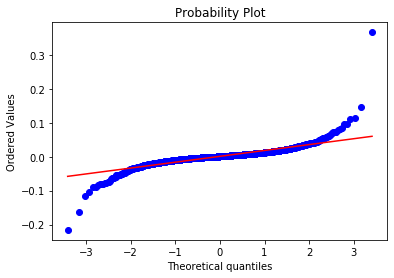

In [111]:
'''Create QQ-plot'''
sc.stats.probplot(data['portfolio_return'][1:], dist="norm", plot=plt)

##### I suggest to keep log of our Methodology and Questions and write email to Svetlana/Sarah next week to verify and ask - do you agree?

**Methodology**
1. Create lags for each individual asset and compute individual asset returns
2. Merge the individual asset datasets and compute portfolio returns and portfolio standard deviation

**Questions**
1. How to deal with unmatching data (i.e. there is obs. for a particular dataset for one asset but none for another asset?). Should we delete all observations for that date altogether? How do we deal with the gap in history? <br>
**Pan:** I took the intersection dates of all five assets. 
I am not sure if it is proper but this is the best we can do so far. <br>
We can ask them!!

2. How to deal with outliers? <br>
**Pan:** The data looks normal so outlier doesn't seem to be a big probelm, but maybe it would affect <br>
when adding the bond. Let's ask as well!

##### Question: My code above looks ugly as I am doing the operations for each dataset separately instead of using some kind of loop to iterate. Can we, please, set up a short call so you can teach me how to do the iteration? :D I will appreciate some CS help! 

**Pan:** Sure, I also took some time to make it into function. <br>
You can have a look and if you don't know some parts, we can have a call :D

I was just trying stuff with VAR and ES below, but it's not working very well so far..maybe you can also take a look

In [93]:
from scipy.stats import norm
def fnVaR_n(dfData, weights, alpha, lookback, percent,initial_investment):
    """
    purpose:
        calculates VaR and ES with variance-covariance method
        using a normal distribution
    input:
        dfData, dataframe
        weights, weights vector
        alpha, significance value
        lookback, lookback period
        percent, True= express in percent
    output:
        VaR expressed in losses (positive value)
    """
    # check alpha
    if alpha > 0.5:
        alpha= 1-alpha
    
    # express years in days
    years= lookback
    # select last n years of data
    DataTemp= dfData.iloc[-years*250:,:-1]  #converted to days
    
    # calculate mean
    mean= np.array(np.mean(DataTemp))@weights.T
    mean= mean[0]
    
    
    # calculate covariance
    cov= np.cov(DataTemp, rowvar= False)
    # calculate variance
    variance= weights@cov@weights.T
    std= np.sqrt(variance[0][0])
    
    # calculate quantile
    z= sc.stats.norm.ppf(alpha)
    VaR= -mean + z * std # μ is negative of the return over one day, so should be negative sign
    VaR= -VaR
    
    #calculate ES - this is not working so far
    #ES= -VaR
    #DataTemp_ES= dfData.iloc[-years:,6]
    #DataTemp_ES= DataTemp_ES[DataTemp_ES < ES]
    #ES= -np.mean(DataTemp_ES)
    
    #if percent == False:
        #VaR= VaR*dfData.iloc[-1,7]
        #ES= ES*dfData.iloc[-1,7]
        #ES= round(ES, 2)
        #VaR= round(VaR, 2)
    #ES = -mean + std*(sc.stats.norm.pdf(z)/(1-alpha))
    mean_return = dfData['portfolio_return'][-years*250:]
    ES_list = [x for x in mean_return if x < -VaR]
    ES = -np.mean(ES_list)
    
    return VaR, ES

In [112]:
'''To use the function below we need a dataframe only with the prices, an array with the weights, and lookback'''
# Set an initial investment level
initial_investment = 1000000

df_prices = data[['BTC_return', 'DBC_return', 'GSPC_return', 'N225_return','portfolio_return']]
weights= np.array([[.25,.25,.25,.25]])
alpha = 0.95
lookback = 3
percent = True

VaR,ES = fnVaR_n(df_prices, weights, alpha, lookback, percent,1000000)
print('(VaR,ES) in percentage is:')
print((VaR,ES))
print('Monetary (VaR,ES) is:')
print((VaR*initial_investment,ES*initial_investment))

(VaR,ES) in percentage is:
(0.0269175959193376, 0.05104776691817315)
Monetary (VaR,ES) is:
(26917.5959193376, 51047.76691817315)


**Pan:** Discussion points <br>
1. Ask about the dates
2. Ask about outliers
3. I set the monetary values as the percertage * the initial investment values (initials values of the portfolio?) <br>
Not sure if it's correct!!!!!!